In [1]:
from corpora_processing import KeyPhraseExtractor
from typing import List, Union

In [2]:
from utils import ConfigLoader, Corpus, Keyword, KeywordType, Language, KeywordTranslator, CorpusFilter

In [3]:
config = ConfigLoader.get_config()

In [4]:
kwt = KeywordTranslator(cache_file=config["translator"]["cache_file"])

In [5]:
corpora: List[Corpus] = [
    Corpus(source=config["corpora"]["bundestag_corpus"], name="bundestag", language=Language.DE),
    Corpus(source=config["corpora"]["abstract_corpus"], name="abstract", language=Language.EN),
    Corpus(source=config["corpora"]["sustainability_corpus"], name="sustainability", language=Language.EN)
]

In [6]:
from simple_statistics import yearwise_documents
mult_years = []
mult_counts = []
filtered_corpora = []
for corpus in corpora:
    corpus = CorpusFilter.filter(corpus=corpus, text_contains_one_of=["fckw", "cfc"])
    filtered_corpora.append(corpus)
    import time
    print(f"{corpus.name}: {len(corpus.get_documents())} documents ({', '.join([str(y) for y in corpus.get_years()])})")
    time.sleep(1)
    
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=100))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)


Filtering 'bundestag' corpus : 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 877973/877973 [00:26<00:00, 32911.30it/s]


bundestag: 298 documents (1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2008, 2009, 2011, 2012, 2014, 2015, 2016, 2018, 2019)


Filtering 'abstract' corpus : 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407961/407961 [00:09<00:00, 40809.98it/s]


abstract: 905 documents (1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


Filtering 'sustainability' corpus : 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221034/221034 [00:05<00:00, 37254.36it/s]


sustainability: 96 documents (2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018)


In [7]:
mult_counts = []
mult_years = []
for corpus in filtered_corpora:
#     years, counts = yearwise_documents(corpus)
    years, counts = yearwise_documents(corpus.sample(number_documents=30, seed=42))
    mult_years.append(years)
    mult_counts.append(counts)
#     simple_bar_histogram(years, counts)

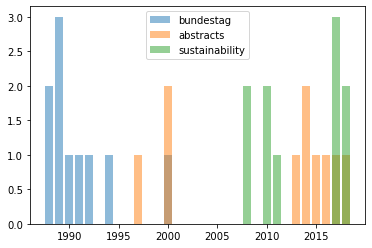

In [8]:
from plot_utils import multi_bar_histogram
multi_bar_histogram(mult_years, mult_counts, labels=["bundestag", "abstracts", "sustainability"], normalize=False, corpus_lengths=[877973, 407961, 221034])

In [13]:
# extract keywords from documents in corpus and assign keywords to documents
sampled_corpora = [corpus.sample(30, seed=42) for corpus in filtered_corpora]
for corpus in sampled_corpora:
    KeyPhraseExtractor.rake(corpus=corpus)

Assign keywords to documents: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 11987.15it/s]


In [15]:
for corpus in sampled_corpora[:]:
    corpus.translate_keywords(restrict_per_document=30)

sampled_corpora[2].get_documents()[0].keywords

found keyword in cache, taking this one
de 	 None 			 hochgradig vernetzen chemische produktionsprozesse
found keyword in cache, taking this one
de 	 None 			 einsatz chemisch produkt anlangt
found keyword in cache, taking this one
de 	 None 			 nie gekannt maß beeinflussen
found keyword in cache, taking this one
de 	 None 			 heutig sicht weder nötigen
found keyword in cache, taking this one
de 	 None 			 industrie typisch satz vorlesen
found keyword in cache, taking this one
de 	 None 			 bundesrepublik produzieren zwei firma
de 	 environmental problems even today often 			 umweltproblemen ja heute häufig
de 	 mr schmid farm address - 			 herr schmidbauer ansprechen –
de 	 finance product alternatively 			 finanzierung alternativ produkt
de 	 chemical coupling products arise 			 chemische koppelprodukte entstehen
de 	 exploit economically favorable 			 ökonomisch günstig verwerten
de 	 theme ozone show 			 thema ozon zeigen
de 	 consulted van lierde 			 konsul van lierde
de 	 within 

ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 letzt 30 jahr
de 	 relevant question - 			 relevant frage –
de 	 give energy-saving program - 			 energieeinsparprogramm geben –
de 	 really dramatic number 			 wirklich dramatische zahl
de 	 land large flat 			 groß land eben
de 	 environmentally destructive today 			 umweltzerstörung heute schon
de 	 third World 			 dritte welt
de 	 - namely 			 – nämlich
de 	 world say 			 welt sagen
de 	 just anyone 			 soeben jemand
de 	 dramatically wettlauf 			 dramatisch wettlauf
de 	 one country 			 derjenige land
de 	 40 year 			 40 jahr
de 	 dramatic example 			 dramatisch weise
de 	 environmentally considerate are only 			 ökologisch sicht stehen erst
de 	 it actually went completely wrong 			 tatsächlich völlig falsch darangegangen
de 	 reached 8 million pieces 			 8 million stück angelangt
de 	 former federal republic increase dramatically 			 ehemalig bundesrepublik drastisch zunehmen
de 	 express - spoke of 			 ausdrücken – sprachen davon
de 	 former bundesrepublik relate 

ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 kommission „ vorsorge
de 	 area far prove 			 gebiet weit bewähren
de 	 Customized as use 			 besonder weise nutzen
de 	 go carefully weighed two ask 			 abwägung zweier frage gehen
de 	 match - work project 			 überein – hervorragen arbeiten
de 	 passed legislature used enquete 			 vergangen legislaturperiode eingesetzt enquete
de 	 rather, must in time - 			 vielmehr muß rechtzeitig –
de 	 consistent political analysis 			 übereinstimmend politisch analyse
de 	 lead coming weeks 			 kommend woche führen
de 	 wise discussion needed 			 kluge diskussion erforderlich
de 	 quite remarkable statement 			 ganz bemerkenswerte aussage
de 	 secure work intensively 			 sichern intensiv beschäftigen
de 	 represent previous speaker impressively 			 vorredner eindrucksvoll darstellen
de 	 bad ecological event 			 schlimm ökologisch ereignis
de 	 regional agreement come 			 regional absprache kommen


ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 rechtzeitig stellen


ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 – handeln


ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 ökologisch grundlage


ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 eindrucksvoll darlegen


ERROR:root:While trying to translate, an error occured:
ERROR:root:Expecting value: line 1 column 1 (char 0)


de 	 None 			 nächst enquete


KeyboardInterrupt: 

In [ ]:
from utils import KeywordMatcher
KeywordMatcher.match_corpora(sampled_corpora[0], sampled_corpora[1])

In [12]:
sampled_corpora[0].documents['po_111215'].keywords

[(administration working investigator represent | gebiet arbeiten forscher repräsentieren),
 (european neighbor state try tough | europäisch nachbarstaaten zäh versuchen),
 (aerosol region 26 000 tonne | aerosolbereich 26 000 t),
 (pole portion always greatly reduce | polbereichen immer stark reduzieren),
 (few thousand ton more | paar tausend tonne mehr),
 (protocol currently in profit adapt | protokoll aktuell ergebnis anpassen),
 betreffen staat müssen erkennen),
 bestehen natürlich bestimmen schwierigkeit),
 möglichst umgehen weitergehen reduzierung),
 nördlich hemisphäre beruhen etwa),
 bundesrepublik deutschland beispiel geben),
 international vorsorgen umweltpolitik stellen),
 treibhauseffekt verursachen spurengase sowie),
 all wissenschaftlich erkenntnis heute),
 4 000 t),
 24 000 t),
 möglichst rasch angehen),
 78 absichtserklärungen bestehen),
 vorsorgen umweltpolitik gelten),
 wissenschaftlich faktum liegen),
 wachsen markt geben),
 oft erschrecken weisen),
 national grenzpf

In [13]:
kwt = KeywordTranslator()
for corpus in sampled_corpora:
    for d in corpus.get_documents():
        print(d.text[:100], '...\n  keywords:')
        for kw in d.keywords:
            print('    - \"'+str(kw)+'\"')
        print('\n')

Frau Präsidentin ! Meine Herr und Dame ! Wenn ich meinen Vorrednerin richtig verstehen habe , können ...
  keywords:
    - "(namely 64,000 t | nämlich 64 000 t)"
    - "(economy suffer | wirtschaft leiden darunter)"
    - "(understand the previous speaker correctly | vorrednerin richtig verstehen)"
    - "(aerosol concentration background decrease continuously | hintergrundaerosolkonzentration nehmen kontinuierlich)"
    - "(Experience blue sore | blau wund erleben)"
    - "(participate lucrative business | lukrativ geschäft beteiligen)"
    - "(cause low temperature | niedrig temperatur führen)"
    - "(give three condition | geben drei bedingung)"
    - "(Dual 14 year | 14 jahr verdoppeln)"
    - "(adopt as early as 1989 | schon 1989 verabschieden)"
    - "(3 ppb chlorine enrichment | 3 ppb chloranreicherung)"
    - "bundesrepublik daran beteiligen)"
    - "ausstieg gehen natürlich)"
    - "stark beteiligen)"
    - "märz 1989)"
    - "massenhaft beteiligen)"
    - "wissenschaftlich v

    - "mehr angst)"
    - "ganz deutlich)"
    - "wirklich erstaunlich)"
    - "menschliche gesundheit)"
    - "kernkraft leisten)"
    - "kenntnis nehmen)"
    - "gesund umwelt)"
    - "gelegentlich sprechen)"
    - "bodenschutzgesetz schaffen)"
    - "annehmen fühlen)"
    - "mehr direkt)"
    - "mehr bürokratie)"
    - "ganz einfach)"
    - "diskussion darüber)"
    - "detail stellen)"
    - "angst instrumentalisieren)"
    - "bereich handeln)"
    - "problem umgehen)"
    - "heikel problem)"
    - "zusätzlich schüren)"
    - "wissenschaftlich vielfach)"
    - "wenig leistung)"
    - "unzureichend papier)"
    - "unvollständig vorlage)"
    - "umweltpolitischen maßnahme)"
    - "thema umwelt)"
    - "sicherheitserhöhende maßnahme)"
    - "schwammig eckpunkteprogramm)"
    - "recht ansprechen)"
    - "produktion aussteigen)"
    - "pressekonferenz reichen)"
    - "nördlich kanada)"
    - "nachfrage einfach)"
    - "mäßigen aussehen)"
    - "miteinander diskutieren)"
    - "mensch dav

In [ ]:
from typing import Dict, List
from collections import Counter

In [ ]:
def key_word_count(keywords: Dict[str, List[str]], top_k=100):
    flattened_keywords = [word for document, document_keywords in keywords.items() for word in document_keywords]
    c = Counter(flattened_keywords)
    if top_k is None:
        return c
    return c.most_common(top_k)

In [ ]:
print(key_word_count(rake_keywords))